In [4]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from bs4 import BeautifulSoup
import re

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

import re
import requests

color_palettes = ['Accent', 'BrBG', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu_r', 'Greens', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'PuBuGn_r', 'PuRd', 'RdBu']
# , , , Blues_r, , BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r


# Contains:
# 1. Loading
# 2. Transforming data for visualisations:
# ---- a. One category, top words
# ---- b. One word, all categories


In [5]:
# 1. Loading data from multiple folders.

In [8]:
# Loads wcount csv files as a dict of dataframes (one per category).
def csvs_to_dict_of_dfs():

    print('Loading word counts CSV files into a dataframes:\
          \n------------------------------------------------')

    # Get data files_paths.
    base_path = os.getcwd() + '/data/word_counts/'
    csv_files = [f for f in os.listdir(base_path)]

    # Iterate over csv_files [categories].
    wcount_frames = {}
    for f in csv_files:

        # Open each csv file as a df.
        csv_file_path = base_path + f
        df = pd.read_csv(csv_file_path, encoding='utf-8')

        # Load each df to all frames dict. 
        category_name = f.split('.')[0]
        wcount_frames[category_name] = df

        print('{:20}: {} ({} words).'.format(category_name, f, len(df)))
        
    return wcount_frames

wcount_frames = csvs_to_dict_of_dfs()
list(wcount_frames.values())[0].head(5)

Loading word counts CSV files into a dataframes:          
------------------------------------------------
Positive            : Positive.csv (12959 words).
Behavioral genetics : Behavioral genetics.csv (25041 words).
Cultural            : Cultural.csv (8038 words).
Quantitative        : Quantitative.csv (16947 words).
Developmental       : Developmental.csv (22574 words).
Mathematical        : Mathematical.csv (12784 words).
Biological          : Biological.csv (12350 words).
Cross-cultural      : Cross-cultural.csv (8110 words).
Experimental        : Experimental.csv (19789 words).
Comperative         : Comperative.csv (13592 words).
Social              : Social.csv (23470 words).
Neuropsychology     : Neuropsychology.csv (12204 words).
Cognitive           : Cognitive.csv (16075 words).
Evolutionary        : Evolutionary.csv (24587 words).
Personality         : Personality.csv (21456 words).
Big Five            : Big Five.csv (16041 words).
Cognitivism         : Cognitivism.csv (979

,word,count,part_of_speach
0,life,718,NOUN
1,one,621,NUM
2,study,579,NOUN
3,psychology,556,NOUN
4,also,539,ADV


In [7]:
# 2. Data transformations for visualisation: One category, top words.


Output:
- 18 frames of [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30] words.
- 18 horizontal bar plots (first 3 below):


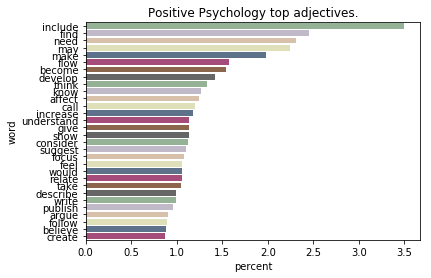

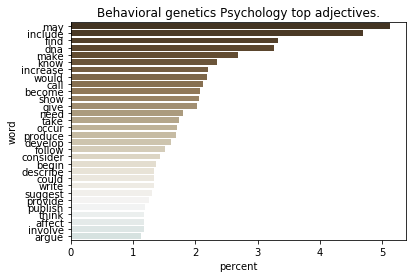

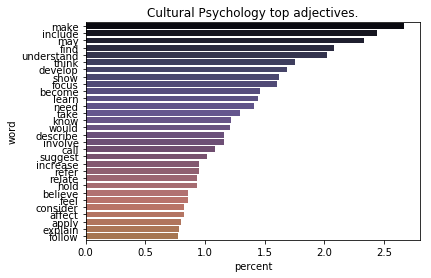

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:
# Takes a dict of frames (1 df/category) of words ordered by occurrence (starting from top),
# returns a dict of frames of N samples of a pos kind ('ADJ' or 'NOUN' or 'VERB' etc)
def get_N_most_occuring_words_of_a_kind(dict_of_frames, N, kind):
    frames_out = {}
    for i, k in enumerate(dict_of_frames.keys()):
        df_raw = dict_of_frames[k]
        df = df_raw[df_raw.part_of_speach == kind].iloc[:N,:]
        
        # Add_relative_percentage_word count statistic.
        df['percent'] = np.round( df['count'] / len(df_raw)*100, 2)

        frames_out[k] = df
    
    return frames_out

def create_category_folder(name):
    if not os.path.exists('plots'):
        os.makedirs('plots')
    if not os.path.exists('plots/' + name):
        os.makedirs('plots/' + name)
        
def one_category_top_words_barplots(dict_of_frames, title_sufix):
    figures = {}
    for i, k in enumerate(dict_of_frames.keys()):
        df = dict_of_frames[k]
        category = k.split('.')[0]
        title = category +  title_sufix # Word + sufix
        
        # Figure
        figure = plt.figure()
        plt.title(title)
        sns.set_palette(color_palettes[i], 50, .5)

        ax = sns.barplot(x="percent", y="word", data=df)
        
        # Save plot to file
        save_dir = 'one_category_top_words'
        create_category_folder(save_dir)
         
        save_path = os.path.join('plots', save_dir, str(i)+'_'+category)
        figure.savefig(save_path)
        
        # Save plot to dict
        figures[k] = figure
       
        plt.close()
        
    return figures

dict_of_frames = get_N_most_occuring_words_of_a_kind(wcount_frames, 30, 'VERB')
plots = one_category_top_words_barplots(dict_of_frames, ' Psychology top adjectives.')


show_n_plots = 3
print('Output:')
print('- {} frames of {} words.'.format( len(list(dict_of_frames.keys())), [len(v) for v in dict_of_frames.values()]))
print('- {} horizontal bar plots (first {} below):'.format(len(plots), show_n_plots))

for i, f in enumerate(plots.keys()):
    if i < show_n_plots:
        plt.figure()
        display(plots[f])

In [7]:
stopwords = nltk.corpus.stopwords.words('english')
WNL = WordNetLemmatizer()

def remove_url(text):
    return re.sub('https?://[A-Za-z0-9./]+','',text)
def html_strip_praser(text):
    return BeautifulSoup(text, "html.parser").get_text()
def html_strip_lxml(text):
    return BeautifulSoup(text, 'lxml').get_text()
def remove_special_characters(text, preserve):
    return re.sub("[^a-zA-Z{}]".format(preserve), " ", text)
def lowercase_text(text):
    return text.lower()
def strip_inner_spaces(text):
    return ' '.join([w.strip() for w in text.split()])
def remove_stop_words(text):
    return ' '.join([w for w in text.split() if not w in set(stopwords)])
def lemmatize_words(text, WNL):
    return ' '.join([WNL.lemmatize(word, pos='v') for word in text.split()])

def word_counts_text_cleaner(text):
    text = remove_url(text)
    #text = html_strip_lxml(text)
    text = remove_special_characters(text, preserve='-')
    text = lowercase_text(text)
    text = strip_inner_spaces(text)
    text = remove_stop_words(text)
    text = lemmatize_words(text, WNL)
    return text

# Load and concantate csv files by a category.

base_path = os.getcwd() + '/data/'

# Iterate over folders [categories].
folder_names = [f for f in os.listdir(base_path)]
topic_frames = []
for fn in folder_names:
    if not '.' in fn and not 'word_counts' in fn:
        
        # Iterate over csv files.
        file_names = [f for f in os.listdir(base_path+fn)]
        folder_frames = []
        for file in file_names:
            
            # Open each csv file.
            csv_file_path = base_path + fn + '/' + file
            df = pd.read_csv(csv_file_path, encoding='utf-8')
            folder_frames.append(df)
            
        # Concat csv files inside each of folders [categories].
        df_category = pd.concat(folder_frames, axis=0)
        topic_frames.append(df_category)
        print('Folder {} done, {} rows.'.format(fn, len(df_category)))

# Concat all csv fiels into one big dataframe of all categories.
df_all = pd.concat(topic_frames, axis=0)
print('All data df done, shaoe {}.'.format(df_all.shape))


Folder Cognitivism done, 5255 rows.
Folder Big_Five done, 13229 rows.
Folder Comperative done, 6748 rows.
Folder Biological done, 6901 rows.
Folder Evolutionary done, 25220 rows.
Folder Mathematical done, 9213 rows.
Folder Experimental done, 17777 rows.
Folder Social done, 27420 rows.
Folder Quantitative done, 12794 rows.
Folder Cross-cultural done, 3617 rows.
Folder Behavioral_genetics done, 23221 rows.
Folder Personality done, 19029 rows.
Folder Differential done, 6408 rows.
Folder Cognitive done, 14498 rows.
Folder Positive done, 7699 rows.
Folder Cultural done, 4460 rows.
Folder Neuropsychology done, 7239 rows.
Folder Developmental done, 24490 rows.
All data df done, shaoe (235218, 4).


In [10]:

# Returns ONE list of all words from all frames.
def get_all_words_from_all_frames(dict_of_frames):
    all_words = []
    for i, k in enumerate(dict_of_frames.keys()):
        df = dict_of_frames[k]
        all_words.extend(df['word'].to_list() )
    return all_words

# Returns all words list with extra parameters: word + avg percentage (regardless of category).
def get_all_words_from_all_frames_WITH_FEATURES(dict_of_frames):
    all_words_F = []
    for i, k in enumerate(dict_of_frames.keys()):
        df = dict_of_frames[k]
        all_words_F.append(zip(df['word'].to_list(), df['percent'].to_list() )  )
    all_words_F = [list(z) for z in all_words_F]
    return all_words_F

# Returns ordered list of all words (by relative percentate) within ALL cagegories.
def get_selected_words_param(all_words, all_words_F, all_words_uniq):
    
    all_words_dict = dict()
    
    # Add 2nd parameter 
    # ...
    
    # Dict of word : cumulative percentage in all categories.
    for w in all_words_uniq:
        all_words_dict[w] = (0)
    for word_data in all_words_F:
        for word, share_percent in word_data:
            all_words_dict[word] += share_percent
    
    # Round results for easyier reading.
    for word in all_words_dict:
        all_words_dict[word] = np.round((all_words_dict[word]/n_categories), 2)

    # Order results (descending).
    def take_second(element):
        return element[1]
    all_words_dict = sorted(all_words_dict.items(), key=take_second)[::-1]

    return all_words_dict

selected_words = get_all_words_from_all_frames(dict_of_frames)
selected_words_uniq = np.unique(selected_words)

selected_words_F = get_all_words_from_all_frames_WITH_FEATURES(dict_of_frames)
n_categories = len(selected_words_F)

selected_words_param = get_selected_words_param(selected_words, selected_words_F, selected_words_uniq)

print('Output:')
print('- list of {} words ({} unique).'.format(len(selected_words), len(selected_words_uniq)))
print('- list of {} categories with {} words ({} parameters each).'.format( n_categories, len(selected_words_F[0]), len(selected_words_F[0][0]) ))
print('- list of {} unique (word, share_percent).'.format(len(selected_words_param)))

Output:
- list of 540 words (62 unique).
- list of 18 categories with 30 words (2 parameters each).
- list of 62 unique (word, share_percent).


In [11]:
# Prepare data to visualisation. dict() = { 'word' : [param, param, param, etc.)], etc. }
def prepare_data_for_visualisation(selected_words_param, selected_words_F):
    selected_words_prepared = dict()
    for word, p in selected_words_param:

        word_data = []
        for category in selected_words_F:
            #print(category)
            category_words = [c[0] for c in category]
            if word in category_words:
                perc = [w[1] for w in category if w[0] == word][0]
                word_data.append(perc)
            else:
                word_data.append(0)
        selected_words_prepared[str(word)] = word_data
    return selected_words_prepared

prepared_word_dict = prepare_data_for_visualisation(selected_words_param, selected_words_F)


print('Output:')
print('- Dict of {} keys "word" : [list of {} category param values].\n'.format( len(prepared_word_dict), len(list(prepared_word_dict.values())[0]) ))
for w,k in list(prepared_word_dict.items())[:4]:
    print(w, k)

Output:
- Dict of 62 keys "word" : [list of 18 category param values].

may [2.24, 5.12, 2.33, 2.57, 6.9, 2.58, 1.91, 2.1, 3.7, 2.07, 6.53, 2.67, 4.29, 5.62, 3.83, 5.59, 2.22, 3.69]
include [3.5, 4.69, 2.44, 4.76, 4.83, 3.64, 2.58, 2.22, 3.25, 3.0, 4.41, 3.12, 3.61, 4.91, 3.85, 4.27, 2.57, 3.21]
make [1.98, 2.69, 2.67, 2.22, 3.46, 2.89, 2.26, 1.6, 2.96, 1.38, 5.03, 2.16, 3.07, 3.04, 2.62, 2.34, 1.68, 2.15]
find [2.45, 3.33, 2.08, 1.28, 3.52, 1.85, 1.25, 1.8, 2.03, 1.81, 4.96, 1.76, 2.99, 3.44, 2.9, 4.58, 1.32, 2.2]


In [10]:
def shape_frame_for_visualisation(prepared_word_dict, wcount_frames):
    # Get dataframe in shape
    df = pd.DataFrame(prepared_word_dict)
    df = df.T
    df.columns = wcount_frames.keys()
    df['word'] = df.index
    df.index = range(len(df))
    df_words = df.iloc[:,-1]
    df = pd.concat([df_words, df], axis=1).iloc[:,:-1]
    #df = pd.concat( [, df.iloc[:,:-1]], axis=0)
    return df

shape_frame_for_visualisation = shape_frame_for_visualisation(prepared_word_dict,wcount_frames)

print('Output: \n- Shaping data into {} DataFrame for visualisation.'.format(shape_frame_for_visualisation.shape))
display(shape_frame_for_visualisation.head(5))

Output: 
- Shaping data into (62, 19) DataFrame for visualisation.


,word,Positive,Behavioral genetics,Cultural,Quantitative,Developmental,Mathematical,Biological,Cross-cultural,Experimental,Comperative,Social,Neuropsychology,Cognitive,Evolutionary,Personality,Big Five,Cognitivism,Differential
0,may,2.24,5.12,2.33,2.57,6.90,2.58,1.91,2.10,3.70,2.07,6.53,2.67,4.29,5.62,3.83,5.59,2.22,3.69
1,include,3.50,4.69,2.44,4.76,4.83,3.64,2.58,2.22,3.25,3.00,4.41,3.12,3.61,4.91,3.85,4.27,2.57,3.21
2,make,1.98,2.69,2.67,2.22,3.46,2.89,2.26,1.60,2.96,1.38,5.03,2.16,3.07,3.04,2.62,2.34,1.68,2.15
3,find,2.45,3.33,2.08,1.28,3.52,1.85,1.25,1.80,2.03,1.81,4.96,1.76,2.99,3.44,2.90,4.58,1.32,2.20
4,learn,0.00,0.00,1.44,1.09,5.67,3.10,0.86,0.90,3.16,1.46,1.83,1.36,4.09,2.17,2.42,1.92,4.13,2.65


Output:
- Graphs of percentage usage of the word among psychology disciplines (based on wikipedia page + all it's links contents).


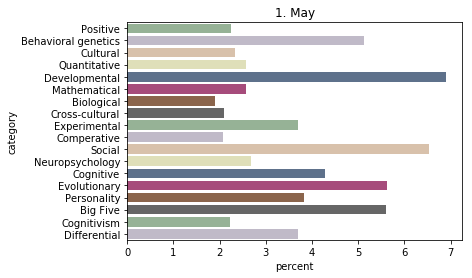

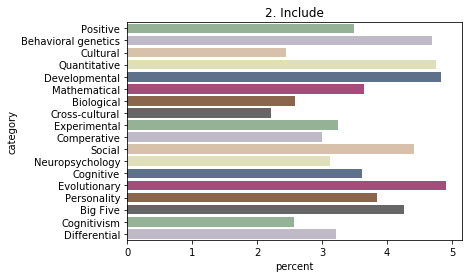

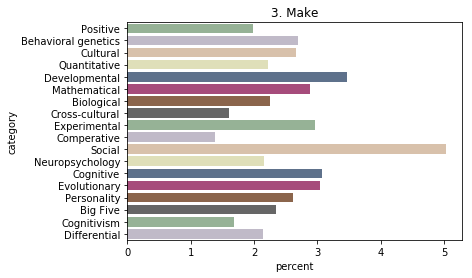

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
def create_category_folder(name):
    if not os.path.exists('plots'):
        os.makedirs('plots')
    if not os.path.exists('plots/' + name):
        os.makedirs('plots/' + name)

# Returns collection of one word - all categories relative occurences.
def one_word_all_categories_barplots(df):
    figures = {}
    for i in range(len(df)):
        
        # reshape data
        d = dict()
        d['category'] = df.columns[1:]
        d['percent'] = df.iloc[i,1:].values
        plot_df = pd.DataFrame(d)

        # settings
        figure = plt.figure()
        title_word = df.iloc[i,0].title()
        title = "{}. {}".format(i+1, title_word)
        plt.title(title)
        sns.set_palette(color_palettes[0], 50, .5)

        # plot
        y = plot_df.category
        x = plot_df.percent
        ax = sns.barplot(y=y,x=x, data=plot_df)

        # Save plot to file
        save_dir = 'one_word_all_categories'
        create_category_folder(save_dir)
        save_path = os.path.join('plots', save_dir,  str(i)+'_'+title_word)
        figure.savefig(save_path)
        
        # Save plot to dict
        figures[title] = figure
        
        plt.close()

    return figures


plots2 = one_word_all_categories_barplots(shape_frame_for_visualisation)
print('Output:')
print("- Graphs of percentage usage of the word among psychology disciplines (based on wikipedia page + all it's links contents).")
show_n_plots = 3
for i, f in enumerate(plots2.keys()):
    if i < show_n_plots:
        plt.figure()
        display(plots2[f])